In [13]:
from ultralytics import YOLO
import numpy as np
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
import librosa
from PIL import Image
import io
import cv2
from IPython.display import display
import time

In [14]:
# load trained models
fan_model = YOLO('/Users/sayyedjilani/datasci210/full_models/runs/classify/train/weights/last.pt')
pump_model = YOLO('/Users/sayyedjilani/datasci210/full_models/runs/classify/train2/weights/last.pt')
slider_model = YOLO('/Users/sayyedjilani/datasci210/full_models/runs/classify/train3/weights/last.pt')
valve_model = YOLO('/Users/sayyedjilani/datasci210/full_models/runs/classify/train4/weights/last.pt')

In [26]:
def predict_from_audio(audio_path, model):
    
    # Load the .wav file
    audio_vector, sr = librosa.load(audio_path, sr=None)
    
    # Set the figure size and DPI to get a 224x224 image
    fig_size = 224 / 100  # inches (224 pixels / 100 DPI)
    dpi = 100  # Dots per inch

    # Plot and save Mel spectrogram as an image
    fig, ax = plt.subplots(figsize=(fig_size, fig_size), dpi=dpi)
    ax.set_axis_off()
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove padding
    
    sgram = librosa.stft(audio_vector)  # Extract short time fourier transform
    sgram_mag, _ = librosa.magphase(sgram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sr)
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)  # Decibel scale
    
    librosa.display.specshow(mel_sgram, sr=sr, ax=ax)

    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    plt.close()

    # Collect Mel from memory buffer
    buf.seek(0)
    mel_sgram_image = Image.open(buf).convert('RGB')

    # Display Mel
    display(mel_sgram_image)
    

    # Make prediction on Mel
    pred = model(mel_sgram_image,verbose=False)
    pred_class = np.argmax(pred[0].probs.data.numpy())  

    
    # Output string values for the classification
    if pred_class == 0:
        pred_class = 'abnormal'
    else:
        pred_class = 'normal'
    
    return pred_class



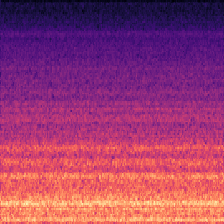


Inference time: 0.08727598190307617 seconds

Prediction: abnormal


In [28]:
start_time = time.time()
prediction = predict_from_audio('6dB_fan/id_02/abnormal/00000079.wav', fan_model)
end_time = time.time()

print(f'\nInference time: {end_time - start_time} seconds')
print(f'\nPrediction: {prediction}')

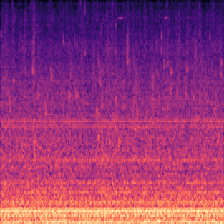


Inference time: 0.08684515953063965 seconds

Prediction: normal


In [30]:
start_time = time.time()
prediction = predict_from_audio('-6dB_pump/id_02/normal/00000199.wav', pump_model)
end_time = time.time()

print(f'\nInference time: {end_time - start_time} seconds')
print(f'\nPrediction: {prediction}')

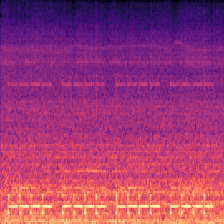


Inference time: 0.08666276931762695 seconds

Prediction: normal


In [31]:
start_time = time.time()
prediction = predict_from_audio('6dB_slider/id_00/normal/00000051.wav', slider_model)
end_time = time.time()

print(f'\nInference time: {end_time - start_time} seconds')
print(f'\nPrediction: {prediction}')

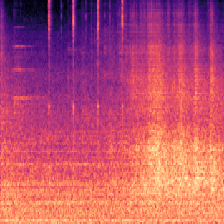


Inference time: 0.08324193954467773 seconds

Prediction: abnormal


In [32]:
start_time = time.time()
prediction = predict_from_audio('0dB_valve/id_00/abnormal/00000019.wav', valve_model)
end_time = time.time()

print(f'\nInference time: {end_time - start_time} seconds')
print(f'\nPrediction: {prediction}')